# Estadística Aplicada

## Gpo 44 - Equipo 1

Cinthia Zaydé G. García Belmonte - 2076329

Jocelyn Daniela Ontiveros Lazcano - 1802651

Jesús Eduardo Hernandez Hernandez - 1816700

Martin Esequiel Hernandez Silva - 1847137

Karla Patricia García Carmona - 1448159

# Series de tiempo
## Inflación

In [ ]:
# Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.5, 6)

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.0 MB/s eta 0:00:00


In [ ]:
# Librerias Especiales
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
#pdarima
import pmdarima as pm

In [ ]:
# Importar base de datos de Inflación
inflacion = pd.read_csv('https://raw.githubusercontent.com/zaygb/EstadisticaAplicada_2076329/main/base_PIA.csv',index_col = 'Periodos', parse_dates= True)

## Introducción

La serie de tiempo mide los niveles de inflacion en periodos de tiempo especificos.

La frecuencia de los datos es una frecuencia mensual.

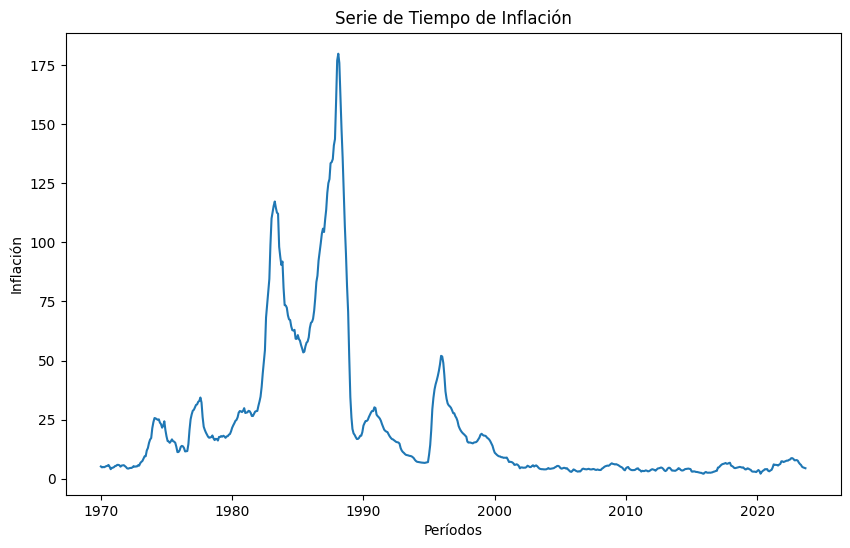

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(inflacion['Inflación'], label='Inflación')
plt.title('Serie de Tiempo de Inflación')
plt.xlabel('Períodos')
plt.ylabel('Inflación');

No se logra ver una tendencia clara, a excepcion de que a partir del año 2000 a la actualidad la inflacion se podria decir que es continua y no varia tanto.

## Estacionalidad

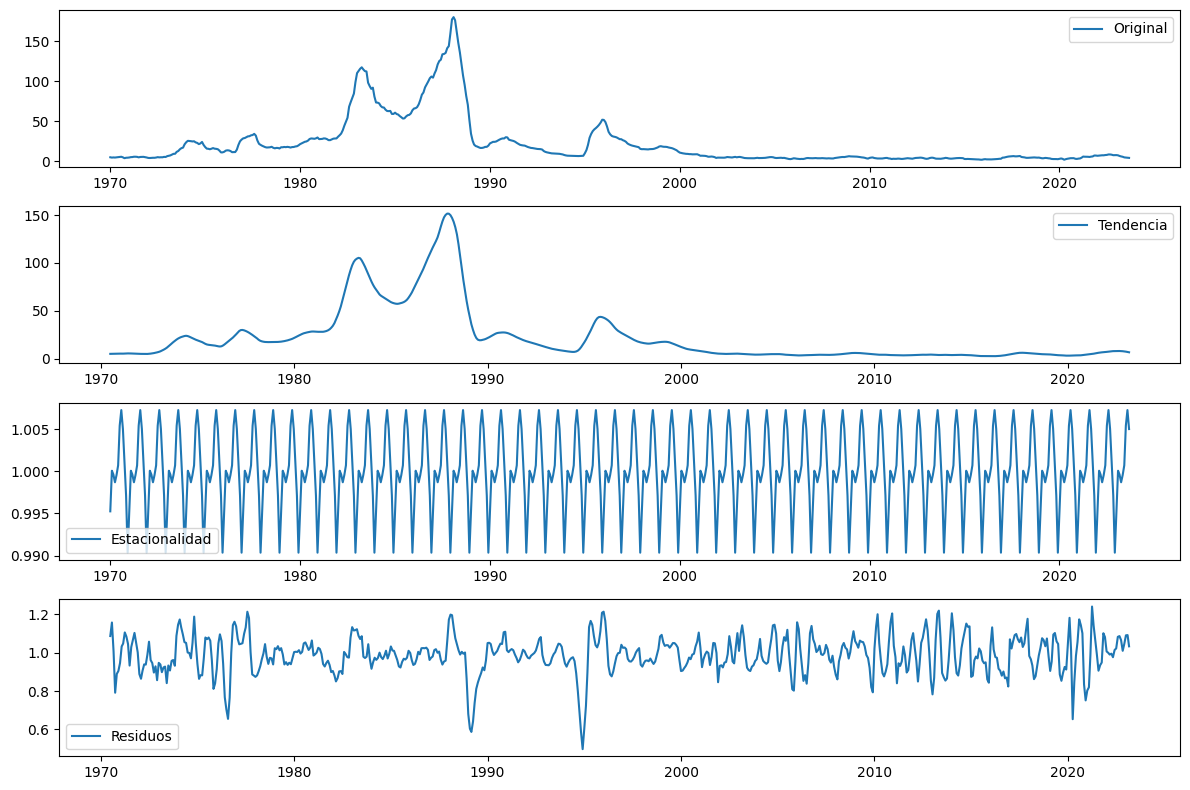

In [ ]:
# Parte II: Estacionalidad
## Gráfico de descomposición estacional
# Descomposición estacional
result = seasonal_decompose(inflacion['Inflación'], model='multiplicative', period=12)  # ajusta el periodo según la estacionalidad observada

# Gráficos de la descomposición
plt.figure(figsize=(12, 8))

# Serie original
plt.subplot(4, 1, 1)
plt.plot(inflacion['Inflación'], label='Original')
plt.legend()

# Tendencia
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Tendencia')
plt.legend()

# Estacionalidad
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Estacionalidad')
plt.legend()

# Residuos
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuos')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Mes con menor inlfación
ets.seasonal.head(12).idxmin().date().month

12

In [ ]:
# Mes con mayor inflación
ets.seasonal.head(12).idxmax().date().month

8

Aumenta en Agosto la inflacion esto puede ser provocado por el regreso a clases, por las vacaciones de verano y disminuye la inflacion en el ultimo mes del año esto es por la temporada navideña, cierre del ciclo anual.

## ¿Por qué es importante el Pronóstico?

Para empresas y sectores economicos, autoridades monetarias, inversionistas y mercados financieros.

El pronóstico de la serie de inflación es crucial porque proporciona información valiosa para la toma de decisiones en diversos niveles, desde políticas macroeconómicas hasta decisiones individuales. La anticipación de la inflación ayuda a mitigar riesgos, planificar eficientemente y promover la estabilidad económica.

## Estadísticas Descriptivas

In [ ]:
# Parte IV: Estadísticas Descriptivas
## Añadir estadísticas descriptivas
estadisticas_descriptivas = inflacion['Inflación'].describe()
print("\nEstadísticas Descriptivas de la Serie de Tiempo:\n", estadisticas_descriptivas)


Estadísticas Descriptivas de la Serie de Tiempo:
 count    645.000000
mean      21.657705
std       30.416820
min        2.130000
25%        4.510000
50%        8.410000
75%       24.430000
max      179.730000
Name: Inflación, dtype: float64


## Promedio Móvil Centrado

5.Para  ver  mejor  el  comportamiento  de  la  variable  aplica  un  promedio móvil centrado

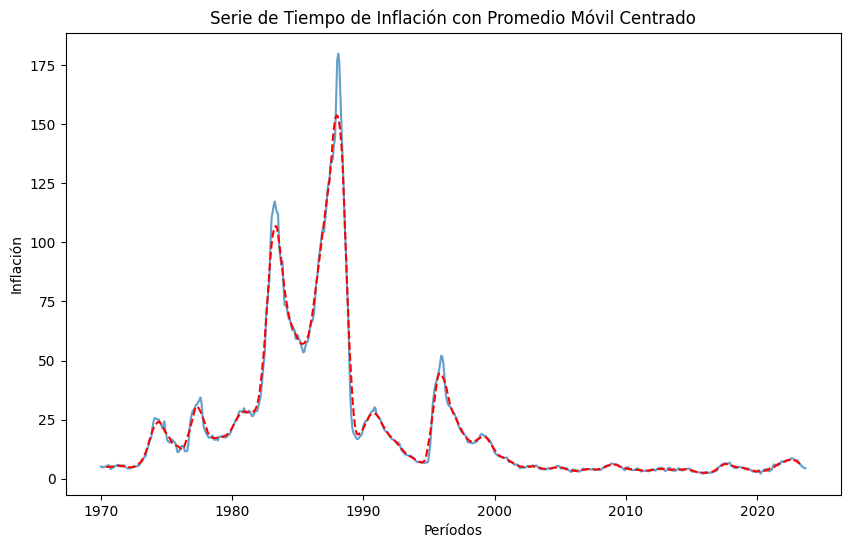

In [ ]:
# Parte V: Promedio Móvil Centrado
## Aplicar promedio móvil centrado
inflacion['promedio_movil'] = inflacion['Inflación'].rolling(window=11, center=True).mean()

# Gráfica con promedio móvil centrado
plt.figure(figsize=(10, 6))
plt.plot(inflacion['Inflación'], label='Inflación', alpha=0.7)
plt.plot(inflacion['promedio_movil'], label='Promedio Móvil Centrado', linestyle='--', color='red')
plt.title('Serie de Tiempo de Inflación con Promedio Móvil Centrado')
plt.xlabel('Períodos')
plt.ylabel('Inflación');

## Descomposición Estacional

In [ ]:
# Descompsición Estacional
ets = seasonal_decompose(inflacion['Inflación'], model='mult')

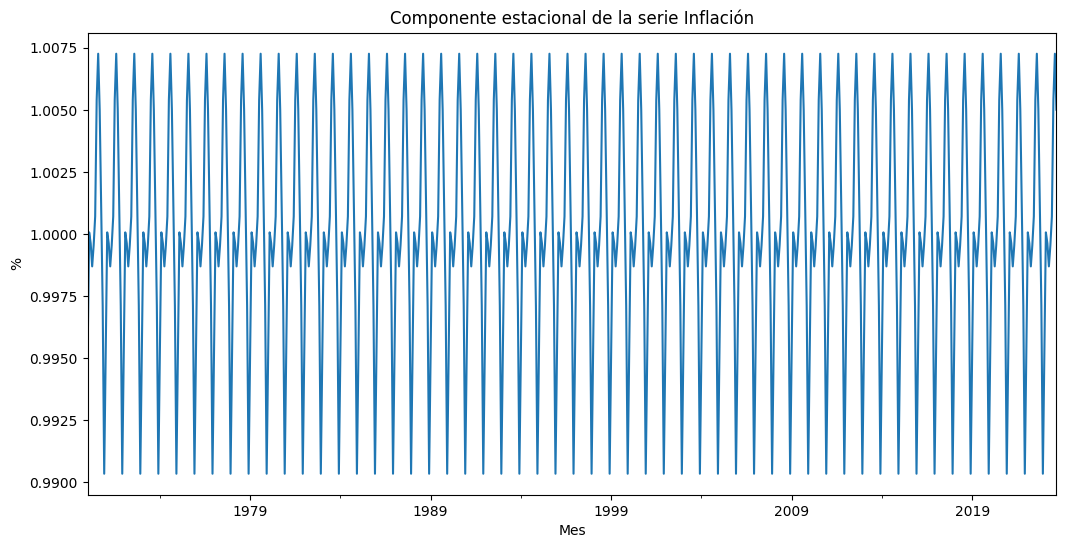

In [ ]:
# Componente estacional
ets.seasonal.plot()
plt.title('Componente estacional de la serie Inflación')
plt.xlabel('Mes')
plt.ylabel('%');

In [ ]:
# Desestacionalizar Serie
inflacion['desestacionalizada'] = inflacion['Inflación']/ets.seasonal

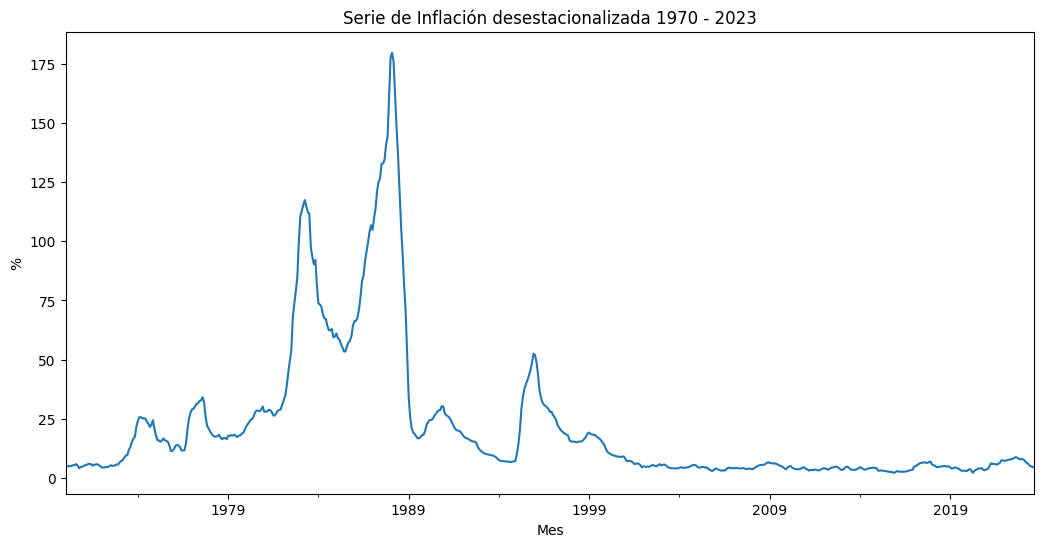

In [ ]:
# Serie desestacionalizada
inflacion['desestacionalizada'].plot()
plt.title('Serie de Inflación desestacionalizada 1970 - 2023')
plt.xlabel('Mes')
plt.ylabel('%');

## Análisis ARIMA

### Prueba de Raíz unitaria a Inflación

*Hipotesis*

$H_0:$ La serie NO es estacionaria

$H_a:$ La serie es estacionaria


*Decisión*

Se Rechaza $H_0$ si $P-Value < \alpha = 0.05$, de lo contrario no se rechaza

In [ ]:
# Prueba de Dickey-Fuller
prueba_adf = adfuller(inflacion['Inflación'])
pvalue = prueba_adf[1]
pvalue.round(2)

0.05

Como P-value no es estrictamente < al $\alpha$ = 0.05, entonces **NO** Rechazamos $H_0$. Esto quiere decir que la serie "Inflación" **no** es estacionaria. Para volverla estacionaria se aplicaran Primeras Diferencias a al serie

In [ ]:
# Primeras Diferencias
inflacion['primeras_diferencias'] = inflacion['Inflación'].diff()

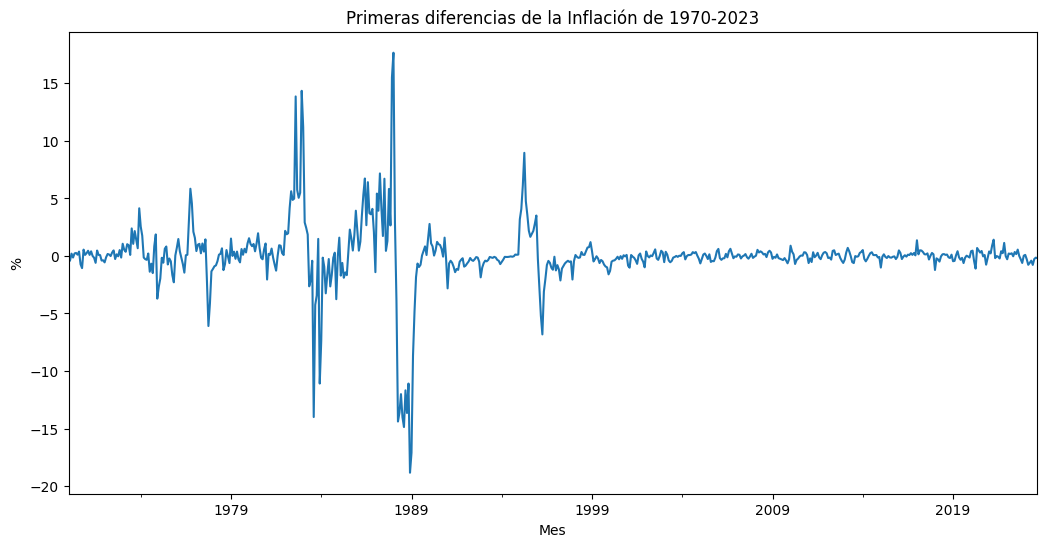

In [ ]:
# Gráfica primeras diferencias
inflacion['primeras_diferencias'].plot()
plt.title('Primeras diferencias de la Inflación de 1970-2023')
plt.xlabel('Mes')
plt.ylabel('%');

Las primeras diferencias se parecen más a una serie estacionaria, pero hay que aplicar prueba de raíz unitaria para comprobar

In [ ]:
# Prueba de Dickey-Fuller
prueba_adf1 = adfuller(inflacion['primeras_diferencias'].dropna())
pvalue1 = prueba_adf1[1]
pvalue1.round(2)

0.0

Como P-value < $\alpha$ = 0.05, entonces Rechazamos $H_0$. Esto quiere decir que la serie "Primeras Diferencias de la Inflación"  es estacionaria.

* Inflación I(1)
* Primeras diferencias de la Inflación I(0)

### Gráficas de Correlación

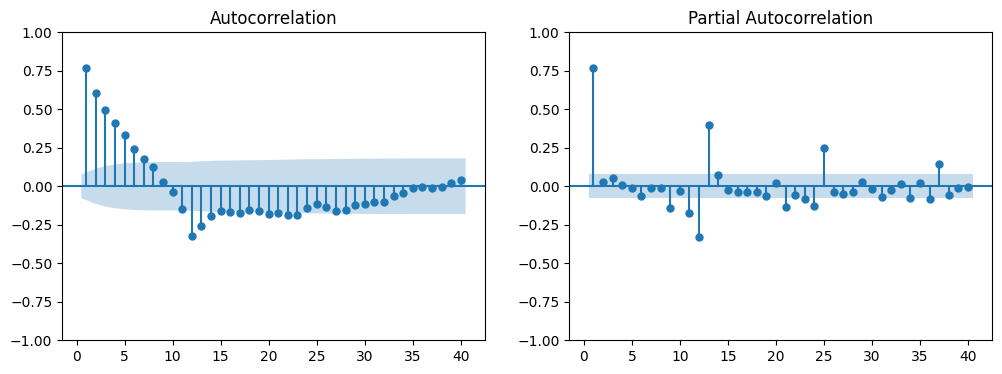

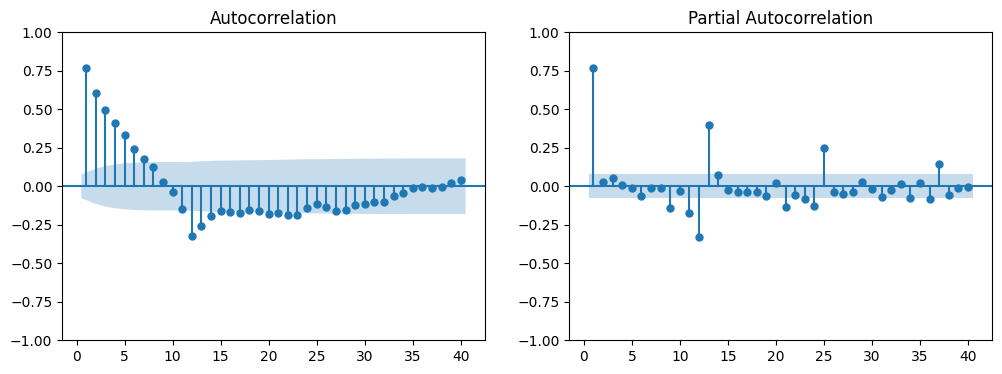

In [ ]:
## graficas de correlación
ig, ax = plt.subplots(1,2,figsize= (12,4))
## 1er subgrafica
plot_acf(inflacion['primeras_diferencias'].dropna(), zero=False, lags=40, ax=ax[0])
plot_pacf(inflacion['primeras_diferencias'].dropna(), zero=False, lags=40, ax=ax[1])

Las gráficas no muestran un patrón regular, lo que indica que no tiene componente estacional (Lo cual es lógico, ya que en pasos anteriores la desestacionalizamos)

### Autoarima

In [ ]:
# identificar el orden del arima
#AIC
pm.auto_arima(inflacion['Inflación'],
              start_p=1, start_q=1,
              max_p=7, max_q=7,
              seasonal=False,
              ic='aic'
              )

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

### Modelo ARIMA

In [ ]:
model = ARIMA(inflacion['Inflación'],
              order=(1,1,0),
              seasonal_order=(0,0,0,0))
results = model.fit()
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Inflación   No. Observations:                  645
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1288.264
Date:                Mon, 13 Nov 2023   AIC                           2580.528
Time:                        17:15:00   BIC                           2589.464
Sample:                    01-01-1970   HQIC                          2583.995
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7686      0.010     79.936      0.000       0.750       0.787
sigma2         3.1949      0.051     63.061      0.000       3.096       3.294
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):             14016.62
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                            -0.90
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

El modelo nos arroja que la serie es un Proceso Autoregresivo de Orden 1 e I(1)
Cuya ecuación general es:

$y_t = ϕy_{t-1} + ϵ_t$  donde $ϵ ~ iid N(0, σ^2_ϵ)$

Con sus coeficientes podemos decir que la ecuación de la serie es:

$y_t = 0.7686y_{t-1} + ϵ_t$  donde $ϵ ~ iid N(0, 3.1949)$


## Prónosticos

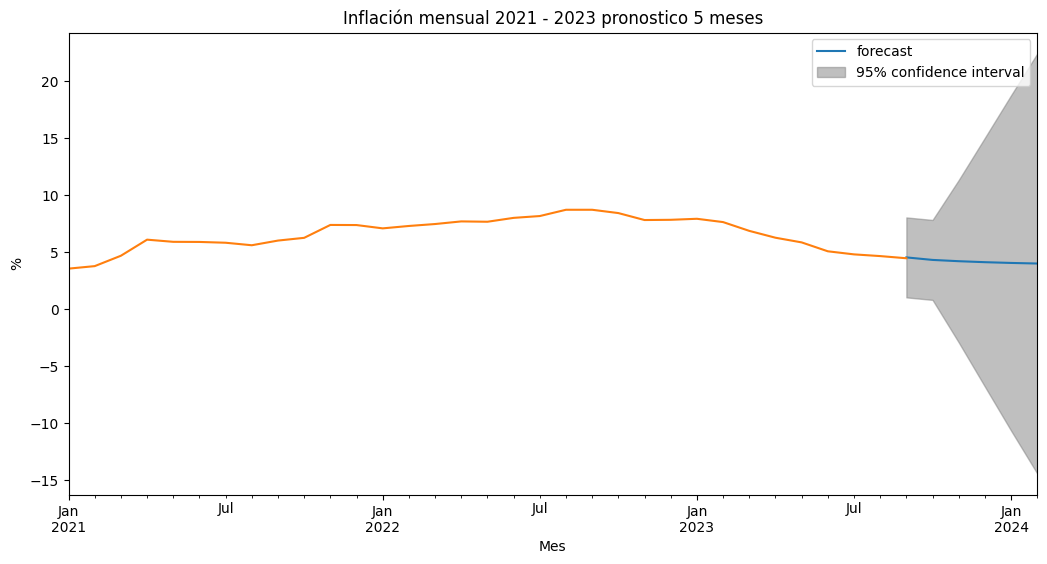

In [ ]:
inicio = '2023-09-01'
fin = '2024-02-01'

plot_predict(results,inicio,fin)

# Se filtrara la base desde 2021 hasta 2023 para poder apreciar la gráfica mejor
inflacion_2021 = inflacion[inflacion.index >= '2021/01/01']
inflacion_2021['Inflación'].plot()
plt.title('Inflación mensual 2021 - 2023 pronostico 5 meses')
plt.xlabel('Mes')
plt.ylabel('%');

In [ ]:
forecast = results.get_forecast(steps=6)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
pronostico_valor = forecast_mean[inicio:fin]
pronostico_intervalos = forecast_ci.loc[inicio:fin]
# juntarlos en un dataframe
df_forecast = pd.DataFrame({
    'pronostico':pronostico_valor,
    'limite inferior': pronostico_intervalos.iloc[:,0],
    'limite superior': pronostico_intervalos.iloc[:,1]
})
df_forecast

,pronostico,limite inferior,limite superior
2023-10-01,4.303970,0.800684,7.807257
2023-11-01,4.191735,-2.925948,11.309418
2023-12-01,4.105473,-6.802146,15.013092
2024-01-01,4.039174,-10.661604,18.739952
2024-02-01,3.988218,-14.419396,22.395832
